## What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for implementing them)


### To make PCA (Principal Component Analysis) more robust we can do:

Standardize the data: Standardizing the data means that each variable is transformed to have a mean of 0 and a standard deviation of 1. This helps to ensure that each variable has an equal influence on the PCA and can prevent variables with larger variances from dominating the results.

In [1]:
from sklearn.preprocessing import StandardScaler
import cv2
import matplotlib.pyplot as plt
import numpy as np

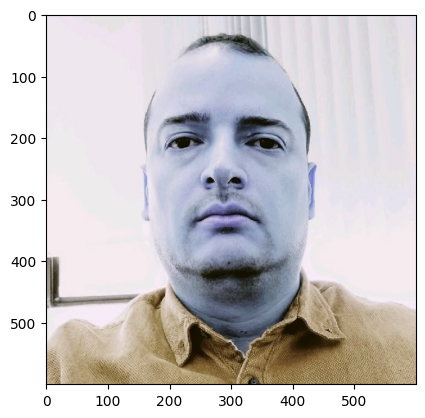

In [2]:
myFile='../pictureFace/JuanCh.png'
originalPhoto=cv2.imread(myFile)
plt.imshow(originalPhoto)


We can decomposite the image at the 3 channels

In [3]:
r,g,b = cv2.split(originalPhoto)

In [4]:
scaler = StandardScaler()
r_scaled = scaler.fit_transform(r)
g_scaled = scaler.fit_transform(g)
b_scaled = scaler.fit_transform(b)
channels=[r_scaled,g_scaled,b_scaled]


We can show and work with each scaled image and independently for each channel

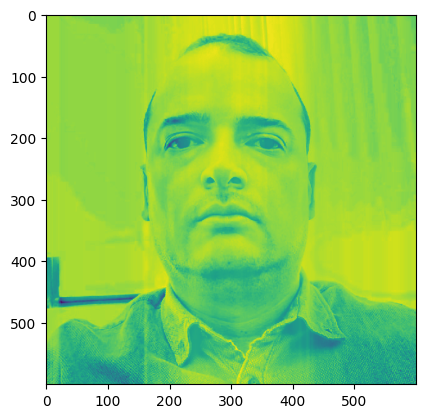

In [5]:
plt.imshow(r_scaled)

### Another strategy is to use a robust estimator for eigenvalue/eigenvector calculation: Standard methods for computing eigenvectors and eigenvalues can be sensitive to outliers. Using a robust estimator can help to mitigate this issue.

In [6]:
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
from matplotlib.image import imread
myFile='../pictureFace/myPhotoGray.png'
image_raw = imread(myFile)


robust_cov = MinCovDet().fit(image_raw)
pca = PCA(n_components=5, svd_solver='randomized', whiten=True)
pca.fit(image_raw, robust_cov.covariance_)

PCA(n_components=5, svd_solver='randomized', whiten=True)

Number of components explaining 95% variance: 0


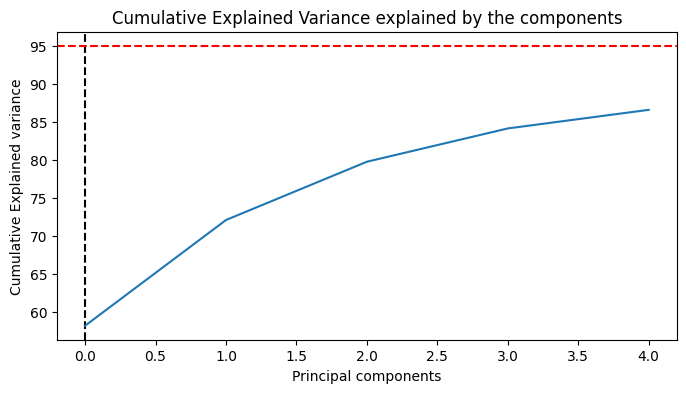

In [7]:
# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[8,4])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)